In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

In [113]:
dataset = pd.read_csv("Mall_Customers.csv")

In [114]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [115]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<BarContainer object of 200 artists>

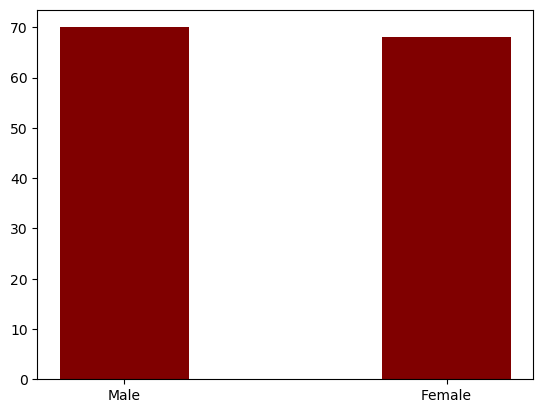

In [116]:
mpl.bar(dataset['Gender'], dataset['Age'], color ='maroon', width = 0.4)

<BarContainer object of 200 artists>

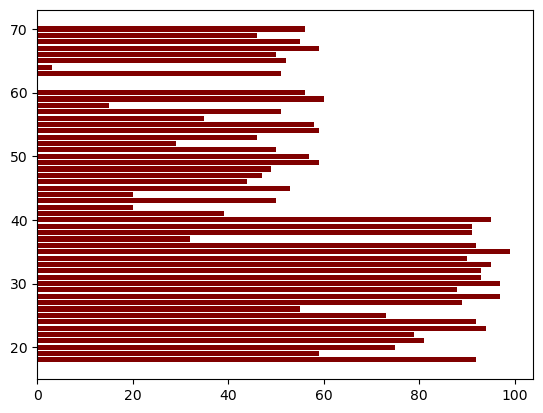

In [117]:
mpl.barh(dataset['Age'], dataset['Spending Score (1-100)'], color ='maroon')

<BarContainer object of 200 artists>

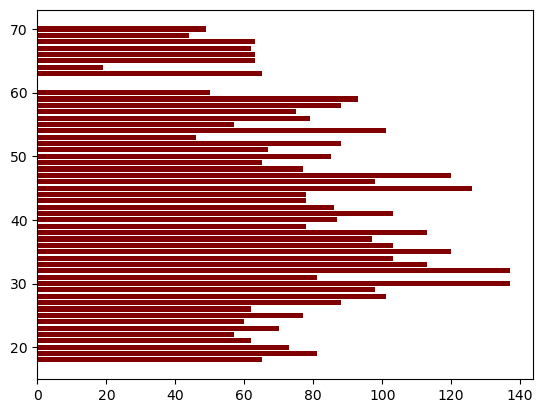

In [118]:
mpl.barh(dataset['Age'], dataset['Annual Income (k$)'], color ='maroon')

In [119]:
freq = dataset['Gender'].value_counts()

([<matplotlib.patches.Wedge at 0x7f76a0d32b50>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

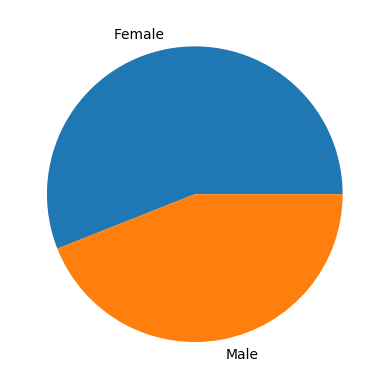

In [120]:
mpl.pie(freq.values , labels=freq.index)

In [121]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [123]:
import seaborn as sns

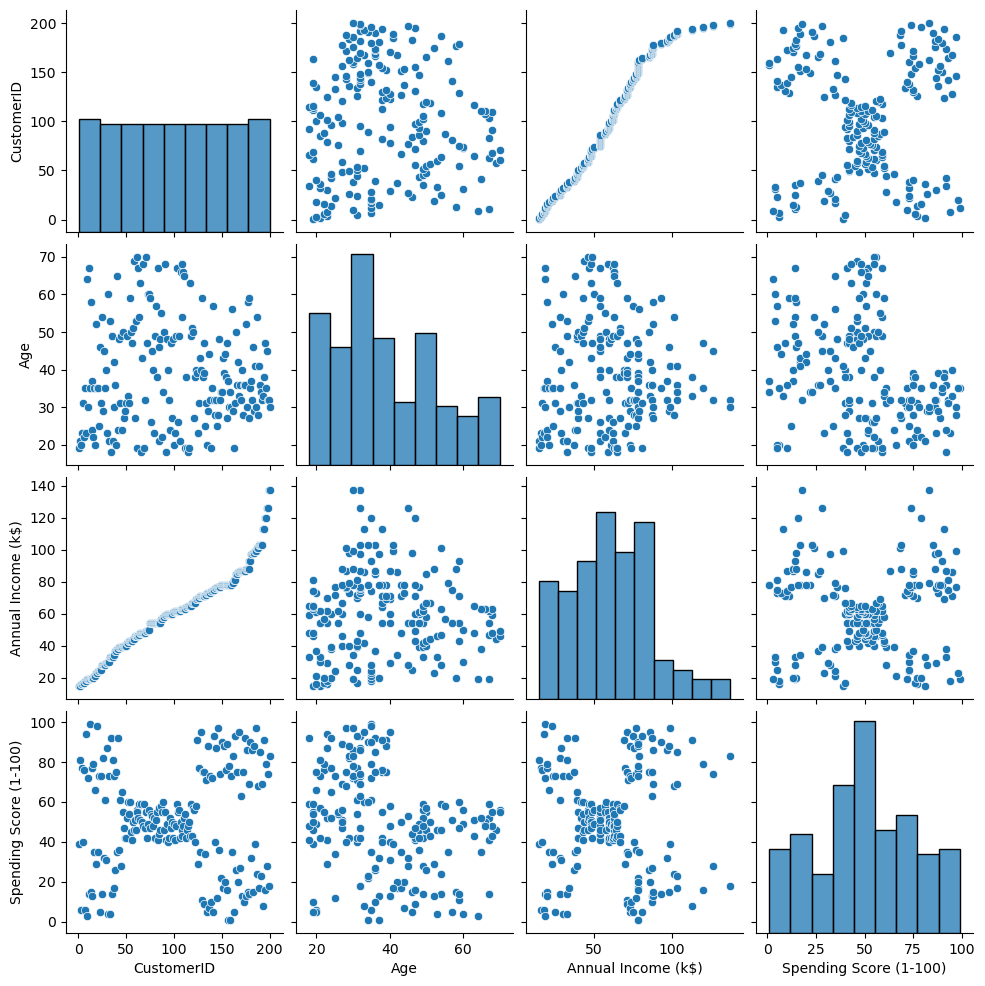

In [124]:
sns.pairplot(dataset)

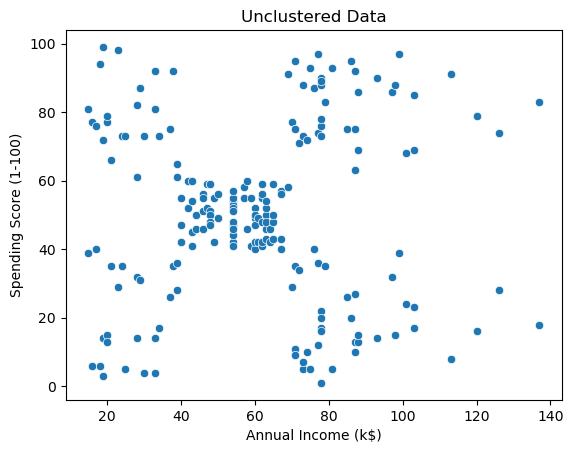

In [125]:
mpl.title("Unclustered Data")
sns.scatterplot(x = dataset['Annual Income (k$)'] , y = dataset['Spending Score (1-100)'])

In [126]:
from sklearn.cluster import KMeans

In [127]:
x = dataset.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [128]:
model = KMeans(n_clusters = 3)

In [129]:
model.fit(x)

/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [130]:
labels = model.predict(x)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [131]:
model.inertia_

106348.37306211119

In [132]:
from sklearn.metrics import silhouette_score

In [133]:
score = silhouette_score(x , labels)
score

0.46761358158775435

In [134]:
sse = []
for i in range(2 , 16):
    model = KMeans(n_clusters = i)
    model.fit(x)
    sse.append(model.inertia_)

/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

In [135]:
sse

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30241.343617936585,
 25022.485004530354,
 21818.11458845218,
 19742.080965794252,
 17602.19046838677,
 15810.343426539726,
 14376.245563291863,
 12738.312658437659,
 11998.352705627705]

In [136]:
len(sse)

14

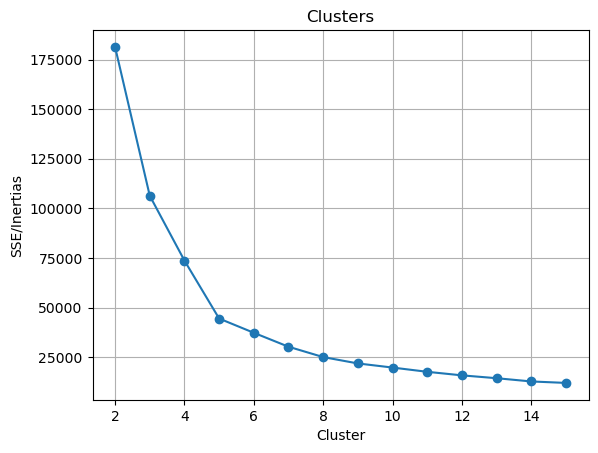

In [137]:
sse_array = np.array(sse)

mpl.plot(range(2, 16), sse_array, marker='o') 
mpl.title("Clusters")
mpl.xlabel("Cluster")
mpl.ylabel("SSE/Inertias")
mpl.grid()
mpl.show()

In [138]:
sil_score = []
for i in range(2 , 16):
    model = KMeans(n_clusters = i)
    model.fit(x)
    labels = model.predict(x)
    score = silhouette_score(x , labels)
    sil_score.append(score)

/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

In [139]:
sil_score

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5288104473798049,
 0.4539630396343125,
 0.4561091950997367,
 0.4364837419704844,
 0.43560008750473395,
 0.42903470410496636,
 0.4125791712476133,
 0.4309136586870319,
 0.429355871433099]

Text(0, 0.5, 'Silhoutte score')

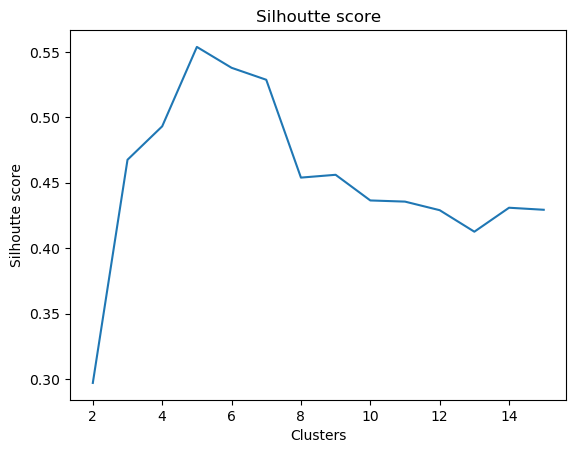

In [140]:
sil_array = np.array(sil_score)

mpl.title("Silhoutte score")
mpl.plot(range(2 , 16) , sil_score)
mpl.xlabel('Clusters')
mpl.ylabel('Silhoutte score')

Text(0, 0.5, 'Silhoutte score')

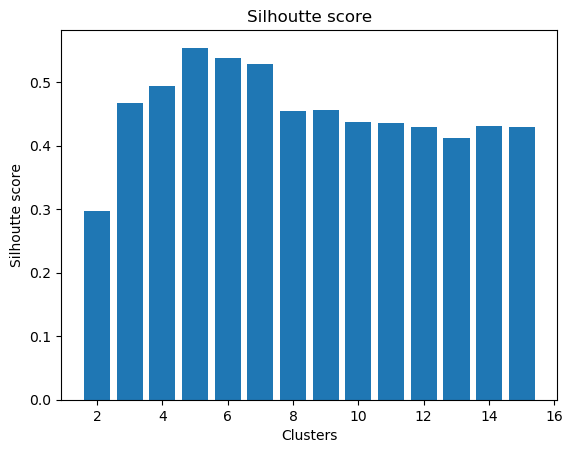

In [141]:
mpl.title("Silhoutte score")
mpl.bar(range(2 , 16) , sil_score)
mpl.xlabel('Clusters')
mpl.ylabel('Silhoutte score')

In [142]:
from sklearn.model_selection import train_test_split
X_train , X_test = train_test_split(x , test_size = 0.2)

In [143]:
len(X_train)

160

In [144]:
len(X_test)

40

In [145]:
model = KMeans(n_clusters = 5)

In [146]:
model.fit(X_train)

/home/student/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [147]:
labels = model.predict(X_train)

In [148]:
model.inertia_

34079.39888334341

In [149]:
sil = silhouette_score(X_train , labels)
sil

0.5606577796150715

In [150]:
labels2 = model.predict(X_test)

In [151]:
sil = silhouette_score(X_test , labels2)
sil

0.533163630773654

In [152]:
centers = model.cluster_centers_
centers

array([[26.55555556, 23.16666667],
       [88.4       , 81.46666667],
       [88.44827586, 18.06896552],
       [56.34375   , 49.5       ],
       [26.10526316, 80.15789474]])

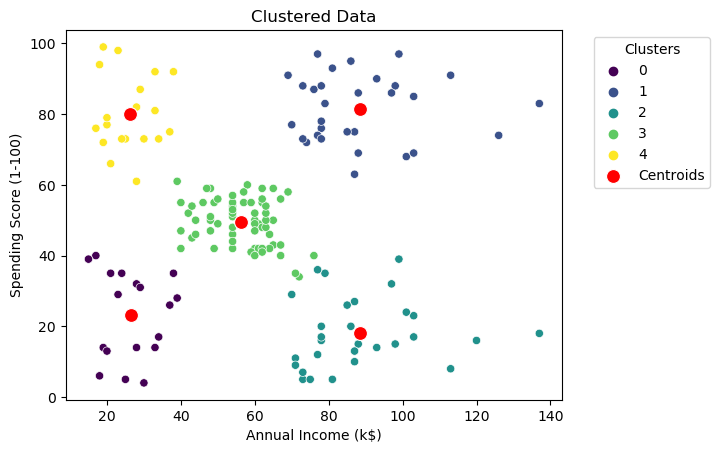

In [153]:
mpl.title("Clustered Data")
sns.scatterplot(x = X_train['Annual Income (k$)'] , y = X_train['Spending Score (1-100)'] , hue=labels, palette='viridis')
sns.scatterplot(x = centers[:,0] , y = centers[:,1] , s=100 , color = 'red' , label='Centroids')
mpl.xlabel('Annual Income (k$)')
mpl.ylabel('Spending Score (1-100)')
mpl.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left') 
mpl.show()

In [154]:
from sklearn.cluster import AgglomerativeClustering

In [155]:
model2 = AgglomerativeClustering(n_clusters = 5)

In [156]:
cluster = model2.fit(X_train)

In [157]:
labels = cluster.labels_
labels

array([2, 1, 1, 2, 1, 0, 1, 1, 3, 1, 1, 3, 0, 4, 3, 1, 1, 0, 2, 0, 3, 0,
       0, 4, 3, 2, 1, 4, 1, 3, 1, 2, 2, 4, 1, 2, 1, 1, 1, 0, 2, 3, 1, 4,
       2, 2, 2, 1, 4, 2, 1, 1, 1, 1, 3, 1, 4, 0, 2, 0, 4, 2, 0, 1, 1, 1,
       1, 2, 1, 1, 0, 4, 0, 0, 1, 4, 1, 1, 4, 2, 1, 3, 2, 1, 0, 1, 1, 1,
       3, 1, 2, 2, 1, 1, 3, 4, 2, 1, 4, 1, 2, 0, 1, 0, 2, 1, 3, 3, 2, 4,
       1, 1, 1, 3, 0, 0, 0, 0, 4, 2, 3, 3, 4, 4, 2, 2, 0, 2, 1, 0, 1, 0,
       1, 1, 2, 1, 0, 3, 1, 4, 0, 1, 1, 1, 2, 1, 0, 3, 1, 1, 1, 1, 3, 1,
       1, 2, 1, 1, 1, 1])

In [158]:
sil = silhouette_score(X_train , labels)
sil

0.5596370907440678

In [159]:
cluster2 = model2.fit(X_test)

In [160]:
labels2 = cluster.labels_
labels2

array([3, 0, 2, 0, 3, 0, 1, 4, 3, 0, 0, 1, 0, 1, 1, 0, 1, 3, 0, 0, 1, 4,
       0, 0, 0, 1, 0, 0, 0, 4, 0, 4, 4, 0, 1, 0, 2, 0, 0, 0])

In [161]:
sil2 = silhouette_score(X_test , labels2)
sil2

0.5716558046420157

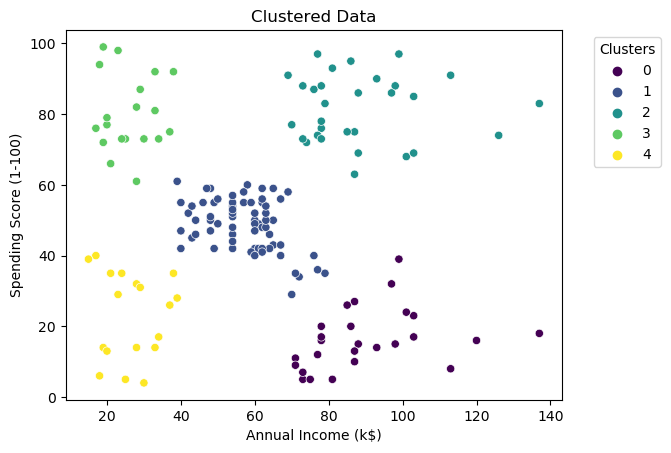

In [162]:
mpl.title("Clustered Data")
sns.scatterplot(x = X_train['Annual Income (k$)'] , y = X_train['Spending Score (1-100)'] , hue=labels, palette='viridis')
# sns.scatterplot(x = centers[:,0] , y = centers[:,1] , s=100 , color = 'red')
mpl.xlabel('Annual Income (k$)')
mpl.ylabel('Spending Score (1-100)')
mpl.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left') 
mpl.show()

In [163]:
from scipy.cluster.hierarchy import dendrogram, linkage

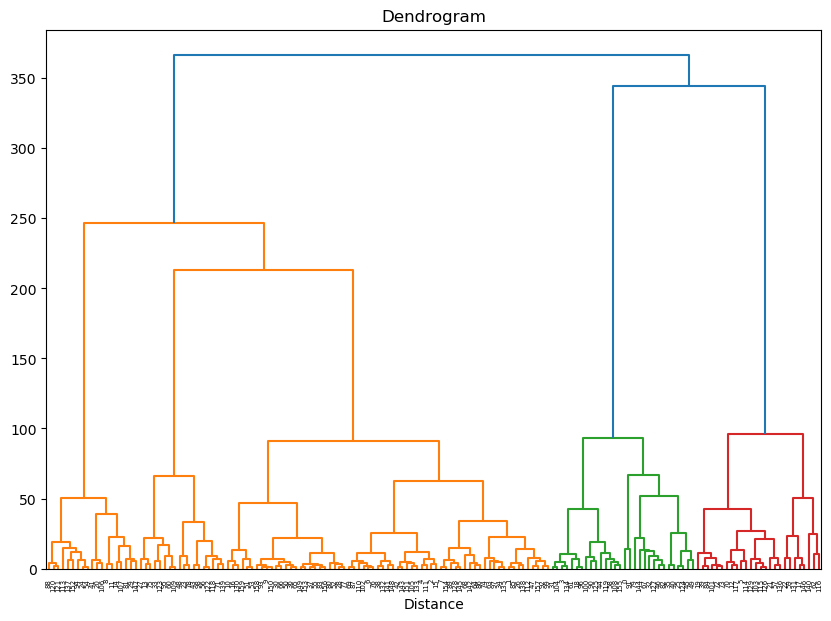

In [164]:
Z = linkage(X_train, method='ward') 

mpl.figure(figsize=(10, 7))
mpl.title("Dendrogram")

dendrogram(Z)
mpl.xlabel('Index')
mpl.xlabel('Distance')
mpl.show()